In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
images, labels = mnist.train.next_batch(10)

In [4]:
# print (images[0])

In [5]:
print (labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


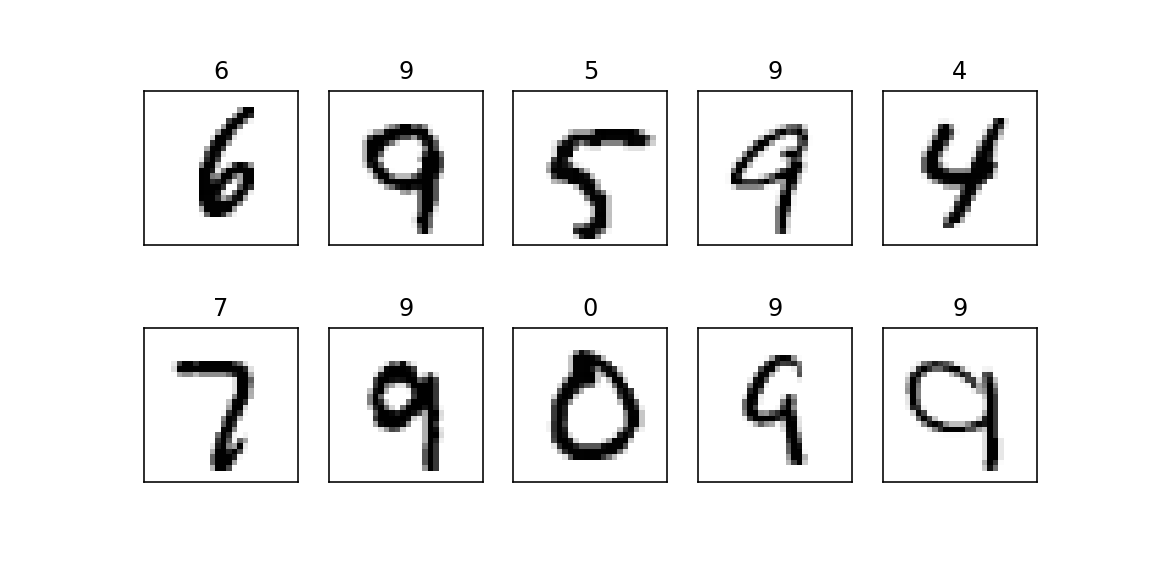

In [7]:
fig = plt.figure(figsize=(8,4))
for c, (image,label) in enumerate(zip(images,labels)):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28,28)), vmin = 0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal,permutation
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160512)

In [9]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
x = tf.placeholder(tf.float32,[None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [11]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [12]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [14]:
i=0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:mnist.test.images,t:mnist.test.labels})
        print ('Step:%d, Loss:%f, Accuracy:%f' % (i, loss_val, acc_val) )

Step:100, Loss:7589.112305, Accuracy:0.846800
Step:200, Loss:5377.666016, Accuracy:0.881000
Step:300, Loss:4526.997559, Accuracy:0.892100
Step:400, Loss:4061.084473, Accuracy:0.898500
Step:500, Loss:3792.079102, Accuracy:0.901800
Step:600, Loss:3620.550537, Accuracy:0.906500
Step:700, Loss:3445.774414, Accuracy:0.909500
Step:800, Loss:3343.882812, Accuracy:0.911400
Step:900, Loss:3262.232422, Accuracy:0.911300
Step:1000, Loss:3165.565918, Accuracy:0.913400
Step:1100, Loss:3132.683594, Accuracy:0.914700
Step:1200, Loss:3102.015869, Accuracy:0.913700
Step:1300, Loss:3020.654297, Accuracy:0.915900
Step:1400, Loss:2980.135254, Accuracy:0.918200
Step:1500, Loss:2966.599121, Accuracy:0.917100
Step:1600, Loss:2945.436035, Accuracy:0.918400
Step:1700, Loss:2911.397461, Accuracy:0.919700
Step:1800, Loss:2883.405273, Accuracy:0.920000
Step:1900, Loss:2862.201660, Accuracy:0.920500
Step:2000, Loss:2851.492188, Accuracy:0.921000


<IPython.core.display.Javascript object>


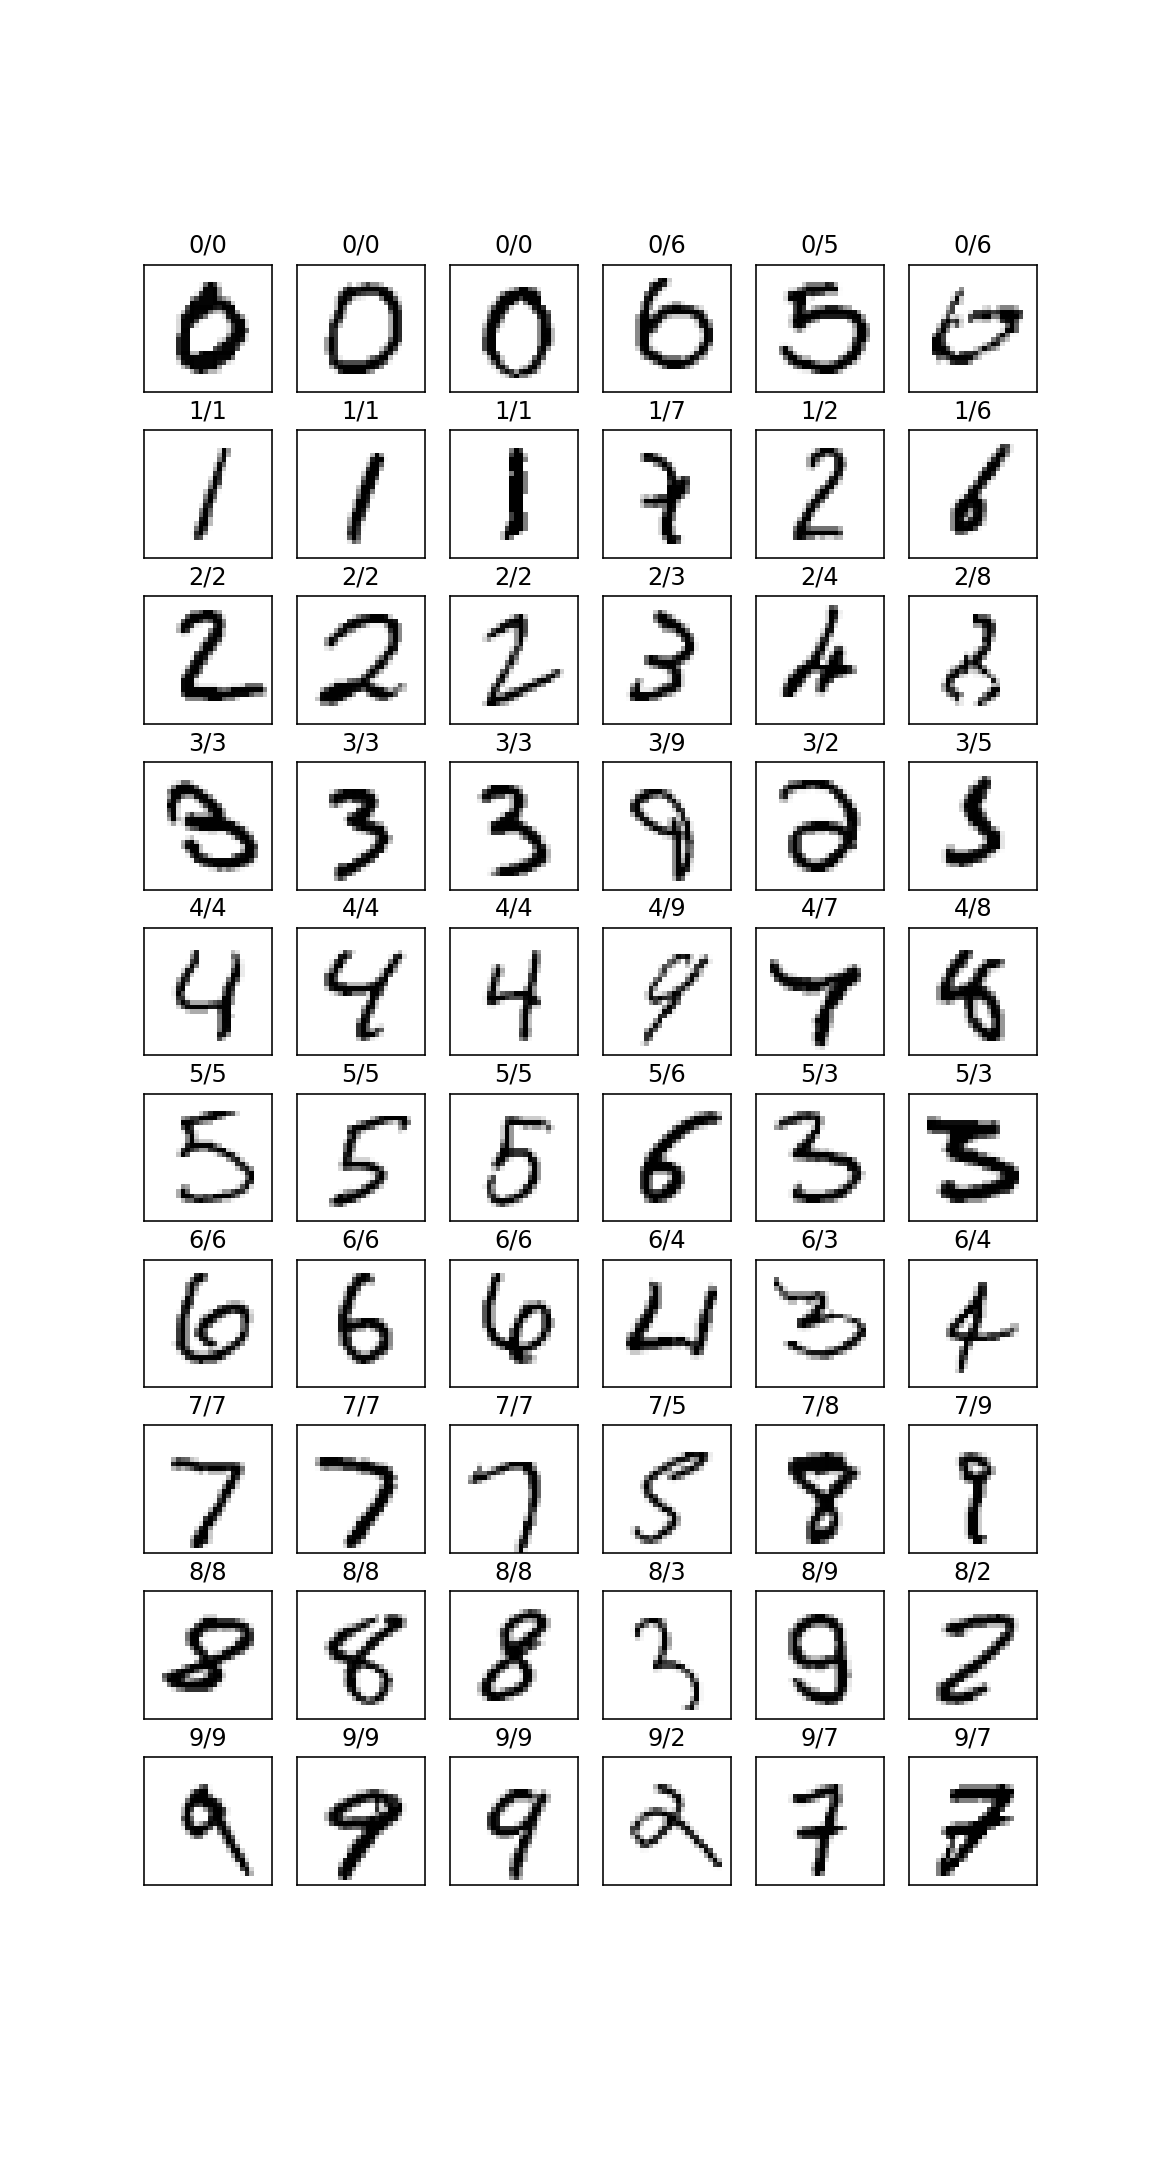

In [15]:
images, labels = mnist.test.images,mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})
fig = plt.figure(figsize = (8,15))

for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
#         print(i)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d/%d' % (prediction,actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break

先週のは、Mnistを使った分類法について